In [1]:
#Import modules
import numpy as np
import pandas as pd
from pylab import *
import glob
import os

from numpy import sqrt, pi, exp, linspace, loadtxt
from lmfit import  Model, Parameter, Parameters

import matplotlib.pyplot as plt

%matplotlib inline

## Time trace

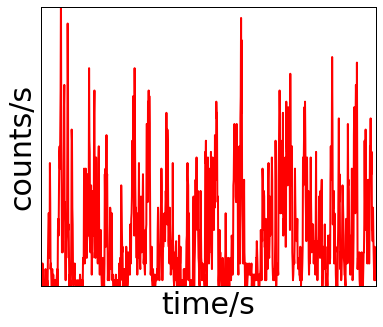

In [140]:
fil = '20150309_point_2_MCS.dat';
df = pd.read_csv(fil, header=None, skiprows=1, sep ='       ', engine='python')
plt.figure(figsize=(6,5))
plot(df[0]-df[0][0], df[1], 'r',linewidth=2.0)
xlim(3, 3.5)
ylim(0, 100)
xticks([ ]); yticks([ ])
xlabel('time/s', fontsize=30)
ylabel('counts/s', fontsize=30)
savefig('20150309_point_2_MCS.png', dpi=600, transparent=True)

## FCS trace

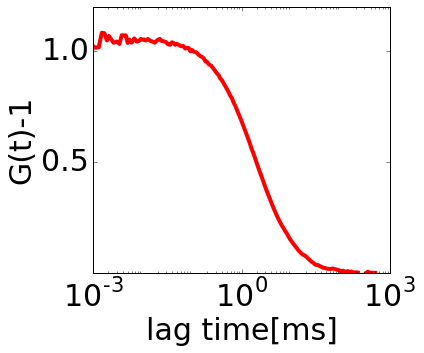

In [181]:
fil = 'gnr_100nMAT647Nnhs_surface_FCS1.dat';
df_fcs = pd.read_csv(fil, header=None, skiprows=1, sep ='\ ', engine='python')
plt.figure(figsize=(6, 5))
plot(df_fcs[0], df_fcs[2], 'r',linewidth=4.0)
xscale('log')
xlabel('lag time[ms]', fontsize=30)
ylabel('G(t)-1', fontsize=30)
xticks([0.001, 1, 1000],fontsize=30)
yticks([0.5, 1],fontsize=30)
xlim(0.001, 1000)
tight_layout()
savefig('gnr_100nMAT647Nnhs_surface_FCS1.png', dpi=600, transparent=True)

In [159]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object

In [160]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000450,NaN,1.005879,NaN,30.205416,NaN,1.005879,NaN,30.205416,NaN,1.005879,NaN,30.205416
1,0.000550,NaN,1.083381,NaN,39.601372,NaN,1.083381,NaN,39.601372,NaN,1.083381,NaN,39.601372
2,0.000650,NaN,1.054333,NaN,43.791506,NaN,1.054333,NaN,43.791506,NaN,1.054333,NaN,43.791506
3,0.000750,NaN,0.985643,NaN,42.438901,NaN,0.985643,NaN,42.438901,NaN,0.985643,NaN,42.438901
4,0.000900,NaN,1.031910,NaN,34.356256,NaN,1.031910,NaN,34.356256,NaN,1.031910,NaN,34.356256
5,0.001100,NaN,1.016073,NaN,45.716263,NaN,1.016073,NaN,45.716263,NaN,1.016073,NaN,45.716263
6,0.001300,NaN,1.017442,NaN,46.510773,NaN,1.017442,NaN,46.510773,NaN,1.017442,NaN,46.510773
7,0.001500,NaN,1.083059,NaN,47.263713,NaN,1.083059,NaN,47.263713,NaN,1.083059,NaN,47.263713
8,0.001700,NaN,1.080950,NaN,62.040441,NaN,1.080950,NaN,62.040441,NaN,1.080950,NaN,62.040441
9,0.001900,NaN,1.048519,NaN,32.432125,NaN,1.048519,NaN,32.432125,NaN,1.048519,NaN,32.432125
